In [1]:
side = 10
scatter_radius = 4
particle_radius = 2
speed = 1.0
num_walls = 5
hole = 3
max_steps = 1000000

%run -i Sinai_billiard_defs.py

# x = 0.0
y = -y_range
# speed = 1.0
theta = np.pi/4

results = run_trial(y=y, theta=theta, max_escapes=1000)

escapes = results[4]
collisions = np.arange(len(escapes))
with np.errstate(all='ignore'):
    ce_ratio = collisions / escapes

In [2]:
draw_hist(pos=results[2], t=results[1])

A Jupyter Widget

In [3]:
import matplotlib.pyplot as plt
import ipywidgets as widgets

h = hole_range
x = x_range
y = y_range
side_bdy = np.array([(h,-y), (x,-y), (x,y), (-x,y), (-x,-y), (-h,-y)])
thetas = np.linspace(0, 2*np.pi, 100)
scatter_bdy = scatter_range * np.array([np.cos(thetas), np.sin(thetas)]).T

pos = results[2]
dpos = np.diff(pos,axis=0)

def draw(steps=1):
    print('boundary / hole = {:.2f}, collisions / escape = {:2f}'.format(1/hb_ratio,ce_ratio[steps]))
    fig, ax = plt.subplots(figsize=[5,5])
    ax.plot(side_bdy[:,0], side_bdy[:,1])
    ax.fill(scatter_bdy[:,0], scatter_bdy[:,1])
    ax.quiver(pos[:steps,0], pos[:steps,1], dpos[:steps,0], dpos[:steps,1], angles='xy', scale_units='xy', scale=1)
    ax.set_aspect('equal')
    plt.show()
    
widgets.interact(draw,steps=(1,pos.shape[0]-1));

A Jupyter Widget

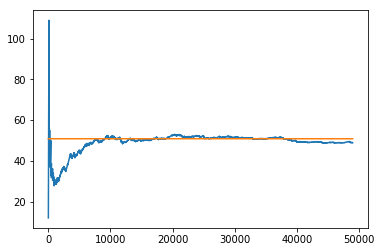

In [6]:
plt.plot(ce_ratio)
plt.plot(np.full_like(ce_ratio,1/hb_ratio))
plt.show()

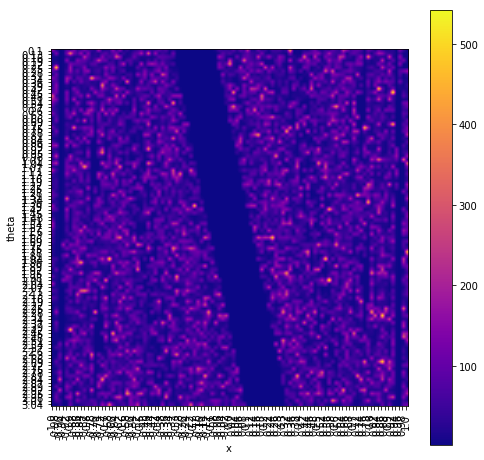

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

rec = pd.DataFrame(exp_list, columns=['x','y','speed','theta'])
rec['num_collisions'] = num_collisions

p = rec.pivot('x','theta','col')

fig, ax = plt.subplots(figsize=[8,8])
plt.imshow(p, interpolation='bilinear',cmap="plasma")
plt.xticks(np.arange(p.shape[0]), p.index, rotation='vertical')
plt.xlabel(p.index.name)
plt.yticks(np.arange(p.shape[1]), p.columns)
plt.ylabel(p.columns.name)
plt.colorbar()
plt.show()
